In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
data = pd.read_csv('elem+hard_feat_class.csv')
data

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,mean_eta_anion,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Thermo_Dyn_stability_level_,Thermo_Dyn_stability_level
0,OH-OH-Ba,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,56,55,...,5.6,0.0,7.2,7.2,7.2,0.0,8.000000,7.376698,Hm,1
1,OH-OH-Be,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,8,7,...,5.6,0.0,62.2,62.2,62.2,0.0,26.333333,12.858844,Mm,4
2,OH-OH-Ca,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,20,19,...,5.6,0.0,14.1,14.1,14.1,0.0,10.300000,8.516885,Hm,1
3,OH-OH-Cd,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,48,47,...,5.6,0.0,4.7,4.7,4.7,0.0,7.166667,6.861269,Hm,1
4,OH-OH-Co,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,27,26,...,5.6,0.0,2.6,2.6,2.6,0.0,6.466667,6.359114,Mh,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,Se-Te-Sn,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,4.6,1.8,11.9,15.5,13.7,1.8,9.166667,6.895986,Hh,0
3095,Se-Te-Tc,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,4.6,1.8,6.4,10.0,8.2,1.8,7.333333,6.121380,Hm,1
3096,Se-Te-Ti,3,0.57735,0.480750,0.415244,0.389977,0.372041,22,52,30,...,4.6,1.8,21.6,25.2,23.4,1.8,12.400000,7.946307,Hm,1
3097,Se-Te-W,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,74,40,...,4.6,1.8,-0.9,2.7,0.9,1.8,4.900000,4.619201,Mm,4


In [4]:
max_eta_anion = data['max_eta_anion']
min_eta_anion = data['min_eta_anion']
geom_eta_anion = np.sqrt(max_eta_anion * min_eta_anion)

In [9]:
data_ = pd.concat([data, geom_eta_anion], axis=1)
data_

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Thermo_Dyn_stability_level_,Thermo_Dyn_stability_level,0
0,OH-OH-Ba,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,56,55,...,0.0,7.2,7.2,7.2,0.0,8.000000,7.376698,Hm,1,5.600000
1,OH-OH-Be,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,8,7,...,0.0,62.2,62.2,62.2,0.0,26.333333,12.858844,Mm,4,5.600000
2,OH-OH-Ca,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,20,19,...,0.0,14.1,14.1,14.1,0.0,10.300000,8.516885,Hm,1,5.600000
3,OH-OH-Cd,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,48,47,...,0.0,4.7,4.7,4.7,0.0,7.166667,6.861269,Hm,1,5.600000
4,OH-OH-Co,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,27,26,...,0.0,2.6,2.6,2.6,0.0,6.466667,6.359114,Mh,3,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,Se-Te-Sn,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,1.8,11.9,15.5,13.7,1.8,9.166667,6.895986,Hh,0,4.233202
3095,Se-Te-Tc,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,1.8,6.4,10.0,8.2,1.8,7.333333,6.121380,Hm,1,4.233202
3096,Se-Te-Ti,3,0.57735,0.480750,0.415244,0.389977,0.372041,22,52,30,...,1.8,21.6,25.2,23.4,1.8,12.400000,7.946307,Hm,1,4.233202
3097,Se-Te-W,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,74,40,...,1.8,-0.9,2.7,0.9,1.8,4.900000,4.619201,Mm,4,4.233202


In [11]:
Y = data_.iloc[:,-2]
Y_ = data_.iloc[:,-3]
Y_

0       Hm
1       Mm
2       Hm
3       Hm
4       Mh
        ..
3094    Hh
3095    Hm
3096    Hm
3097    Mm
3098    Hm
Name: Thermo_Dyn_stability_level_, Length: 3099, dtype: object

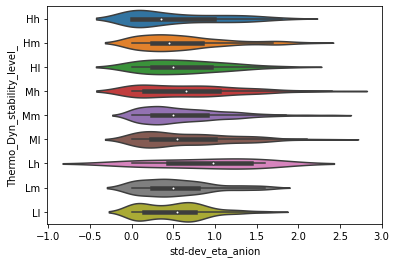

In [12]:
sns.violinplot(x="std-dev_eta_anion", y="Thermo_Dyn_stability_level_", data=data, 
               order=["Hh", "Hm", "Hl", "Mh", "Mm", "Ml", "Lh", "Lm", "Ll"])
plt.savefig('violin_std-dev_eta_l.eps', dpi=300)

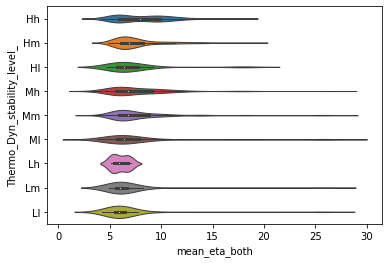

In [13]:
sns.violinplot(x="mean_eta_both", y="Thermo_Dyn_stability_level_", data=data, 
               order=["Hh", "Hm", "Hl", "Mh", "Mm", "Ml", "Lh", "Lm", "Ll"], linewidth=1.0)
plt.savefig('violin_mean_eta_both.eps', dpi=300)

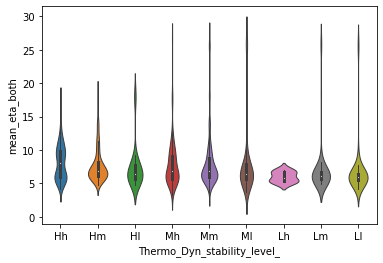

In [28]:
sns.violinplot(y="mean_eta_both", x="Thermo_Dyn_stability_level_", data=data, 
               order=["Hh", "Hm", "Hl", "Mh", "Mm", "Ml", "Lh", "Lm", "Ll"], linewidth=1.0)
plt.savefig('violin_mean_eta_both2.eps', dpi=300)

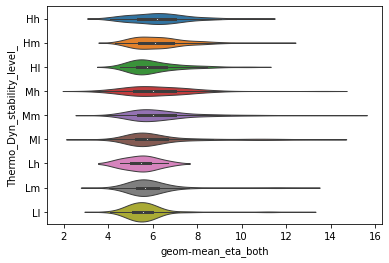

In [14]:
sns.violinplot(x="geom-mean_eta_both", y="Thermo_Dyn_stability_level_", data=data, 
               order=["Hh", "Hm", "Hl", "Mh", "Mm", "Ml", "Lh", "Lm", "Ll"], linewidth=1.0)
plt.savefig('violin_gmean_eta_both.eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


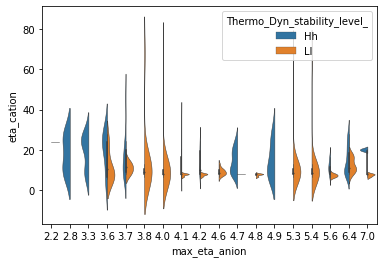

In [15]:
ax = sns.violinplot(x="max_eta_anion", y="eta_cation", hue="Thermo_Dyn_stability_level_", split="True",
                    data=data.query("Thermo_Dyn_stability_level == 0 or Thermo_Dyn_stability_level == 8"), linewidth=0.5)
plt.savefig('violin_max_etal_etac.eps', dpi=300)

In [26]:
data_.rename(columns={0: 'gmean_eta_anion'}, inplace=True)
data_

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Thermo_Dyn_stability_level_,Thermo_Dyn_stability_level,gmean_eta_anion
0,OH-OH-Ba,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,56,55,...,0.0,7.2,7.2,7.2,0.0,8.000000,7.376698,Hm,1,5.600000
1,OH-OH-Be,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,8,7,...,0.0,62.2,62.2,62.2,0.0,26.333333,12.858844,Mm,4,5.600000
2,OH-OH-Ca,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,20,19,...,0.0,14.1,14.1,14.1,0.0,10.300000,8.516885,Hm,1,5.600000
3,OH-OH-Cd,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,48,47,...,0.0,4.7,4.7,4.7,0.0,7.166667,6.861269,Hm,1,5.600000
4,OH-OH-Co,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,27,26,...,0.0,2.6,2.6,2.6,0.0,6.466667,6.359114,Mh,3,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,Se-Te-Sn,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,1.8,11.9,15.5,13.7,1.8,9.166667,6.895986,Hh,0,4.233202
3095,Se-Te-Tc,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,1.8,6.4,10.0,8.2,1.8,7.333333,6.121380,Hm,1,4.233202
3096,Se-Te-Ti,3,0.57735,0.480750,0.415244,0.389977,0.372041,22,52,30,...,1.8,21.6,25.2,23.4,1.8,12.400000,7.946307,Hm,1,4.233202
3097,Se-Te-W,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,74,40,...,1.8,-0.9,2.7,0.9,1.8,4.900000,4.619201,Mm,4,4.233202


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


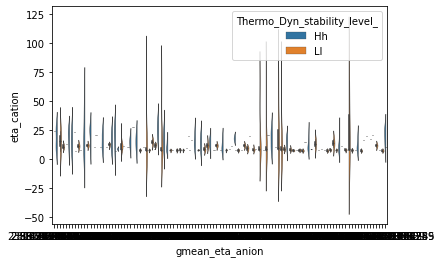

In [27]:
ax = sns.violinplot(x="gmean_eta_anion", y="eta_cation", hue="Thermo_Dyn_stability_level_", split="True",
                    data=data_.query("Thermo_Dyn_stability_level == 0 or Thermo_Dyn_stability_level == 8"), linewidth=0.5)
plt.savefig('violin_gmean_etal_etac.eps', dpi=300)

In [24]:
data_

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Thermo_Dyn_stability_level_,Thermo_Dyn_stability_level,0
0,OH-OH-Ba,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,56,55,...,0.0,7.2,7.2,7.2,0.0,8.000000,7.376698,Hm,1,5.600000
1,OH-OH-Be,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,8,7,...,0.0,62.2,62.2,62.2,0.0,26.333333,12.858844,Mm,4,5.600000
2,OH-OH-Ca,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,20,19,...,0.0,14.1,14.1,14.1,0.0,10.300000,8.516885,Hm,1,5.600000
3,OH-OH-Cd,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,48,47,...,0.0,4.7,4.7,4.7,0.0,7.166667,6.861269,Hm,1,5.600000
4,OH-OH-Co,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,27,26,...,0.0,2.6,2.6,2.6,0.0,6.466667,6.359114,Mh,3,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,Se-Te-Sn,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,1.8,11.9,15.5,13.7,1.8,9.166667,6.895986,Hh,0,4.233202
3095,Se-Te-Tc,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,1.8,6.4,10.0,8.2,1.8,7.333333,6.121380,Hm,1,4.233202
3096,Se-Te-Ti,3,0.57735,0.480750,0.415244,0.389977,0.372041,22,52,30,...,1.8,21.6,25.2,23.4,1.8,12.400000,7.946307,Hm,1,4.233202
3097,Se-Te-W,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,74,40,...,1.8,-0.9,2.7,0.9,1.8,4.900000,4.619201,Mm,4,4.233202
